In [1]:
import numpy as np
import platform
from PIL import ImageFont, ImageDraw, Image
import matplotlib.pyplot as plt
 
import uuid
import json
import time
import cv2
import requests

In [2]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [3]:
def put_text(image, text, x, y, color=(0, 255, 0), font_size=22):
    if type(image) == np.ndarray:
        color_coverted = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = Image.fromarray(color_coverted)
 
    if platform.system() == 'Darwin':
        font = 'AppleGothic.ttf'
    elif platform.system() == 'Windows':
        font = 'malgun.ttf'
        
    image_font = ImageFont.truetype(font, font_size)
    font = ImageFont.load_default()
    draw = ImageDraw.Draw(image)
 
    draw.text((x, y), text, font=image_font, fill=color)
    
    numpy_image = np.array(image)
    opencv_image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)
 
    return opencv_image

In [4]:
api_url = 'https://pxft2tdca1.apigw.ntruss.com/custom/v1/24343/288dfd5920145d4b13da7fc0baf4430c1b82a5fb5073d245aaa62cc669c5b7a1/general'
secret_key = 'eHJueGNsaW1CVFJZU25zUG5NSUlsTVB3QU5sdFhWY3M='

In [5]:
path = 'asset/images/test_image.jpeg'
files = [('file', open(path,'rb'))]

In [6]:
request_json = {'images': [{'format': 'jpg',
                                'name': 'demo'
                               }],
                    'requestId': str(uuid.uuid4()),
                    'version': 'V2',
                    'timestamp': int(round(time.time() * 1000))
                   }
 
payload = {'message': json.dumps(request_json).encode('UTF-8')}
 
headers = {
  'X-OCR-SECRET': secret_key,
}
 
response = requests.request("POST", api_url, headers=headers, data=payload, files=files)
result = response.json()

AltFIC신용승인(0520)(회원용)단말기:2959654541전표번호:003923가맹점:크린킹수선주소:경기평택시안중읍인현로서7길8대표자 :신미경사업자 :819-23-00081TEL:0316866161금액19,000 원합계19,000원우리카드카드번호:5387-20**-****-5566(C)일시불거래일시:2023/08/0718:18:53승인번호:74496677매입:비씨카드사가맹 :794668413문의:TEL)1544-4700알림:EDC매출표*감사합니다*

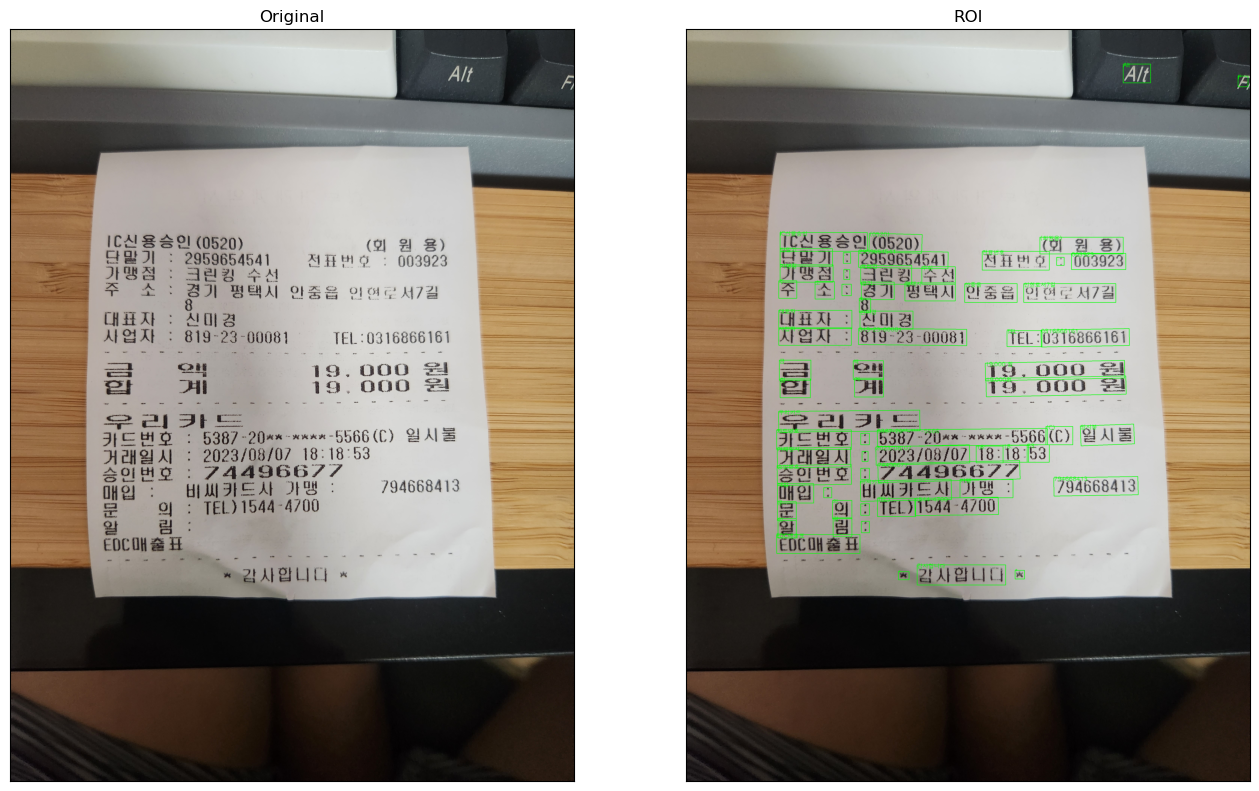

In [7]:
texts = []

img = cv2.imread(path)
roi_img = img.copy()
 
for field in result['images'][0]['fields']:
    text = field['inferText']
    vertices_list = field['boundingPoly']['vertices']
    pts = [tuple(vertice.values()) for vertice in vertices_list]
    topLeft = [int(_) for _ in pts[0]]
    topRight = [int(_) for _ in pts[1]]
    bottomRight = [int(_) for _ in pts[2]]
    bottomLeft = [int(_) for _ in pts[3]]
 
    cv2.line(roi_img, topLeft, topRight, (0,255,0), 2)
    cv2.line(roi_img, topRight, bottomRight, (0,255,0), 2)
    cv2.line(roi_img, bottomRight, bottomLeft, (0,255,0), 2)
    cv2.line(roi_img, bottomLeft, topLeft, (0,255,0), 2)
    roi_img = put_text(roi_img, text, topLeft[0], topLeft[1] - 10, font_size=30)
    
    print(text,end='')
    texts.append(text)
 
plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))

In [ ]:
raw_text = ''
for i in texts:
	raw_text += (i+' ')

print(raw_text)

Alt F IC신용승인 (0520) (회원용) 단말기 : 2959654541 전표번호 : 003923 가맹점 : 크린킹 수선 주 소 : 경기 평택시 안중읍 인현로서7길 8 대표자 : 신미경 사업자 : 819-23-00081 TEL: 0316866161 금 액 19,000 원 합 계 19,000원 우리카드 카드번호 : 5387-20**-****-5566 (C) 일시불 거래일시 : 2023/08/07 18: 18: 53 승인번호 : 74496677 매입 : 비씨카드사 가맹 : 794668413 문 의 : TEL) 1544-4700 알 림 : EDC매출표 * 감사합니다 * 
